In [235]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr,shapiro,spearmanr,kendalltau,chi2_contingency,kruskal,studentized_range,mannwhitneyu
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,mean_squared_error,mean_absolute_error,jaccard_score,log_loss,accuracy_score,f1_score,precision_score,recall_score

In [236]:
encodage = 'ISO-8859-1'
data = pd.read_csv('Data.csv',sep=';',encoding=encodage)

In [237]:
data.head()

,Unnamed: 0,index,date,couleur des yeux,age,exp,salaire,sexe,diplome,métier,note,dispo,embauche,ville d'origine
0,0,0,02/06/2012,Vert,25.0,9.0,26803.0,F,licence,Data Scientist,97.08,non,0,9
1,1,1,21/04/2011,Bleu,35.0,13.0,38166.0,M,licence,Data Analyst,63.86,non,0,12
2,2,2,07/09/2012,Bleu,29.0,13.0,35207.0,M,licence,Data Scientist,78.50,non,0,9
3,3,3,01/07/2011,Hazel,NaN,12.0,32442.0,M,licence,Data Scientist,45.09,non,0,11
4,4,4,07/08/2012,Vert,35.0,6.0,28533.0,F,licence,Data Engineer,81.91,non,0,6


In [238]:
data.tail()

,Unnamed: 0,index,date,couleur des yeux,age,exp,salaire,sexe,diplome,métier,note,dispo,embauche,ville d'origine
19995,19995,19995,10/03/2012,Vert,47.0,9.0,35723.0,M,licence,Data Scientist,66.47,non,0,6
19996,19996,19996,19/09/2010,Marron,38.0,10.0,33570.0,F,master,Data Scientist,62.29,non,1,2
19997,19997,19997,02/09/2010,Marron,23.0,6.0,33751.0,F,doctorat,Data Engineer,103.48,oui,0,4
19998,19998,19998,06/12/2011,Marron,33.0,11.0,34167.0,F,licence,Data Engineer,73.35,non,0,9
19999,19999,19999,29/11/2010,Hazel,35.0,14.0,44499.0,M,bac,Data Scientist,45.62,non,0,15


# Analyse Descriptif de notre base de données ou dataset

In [239]:
#les types de données de nos variables
data.dtypes

Unnamed: 0            int64
index                 int64
date                 object
couleur des yeux     object
age                 float64
exp                 float64
salaire             float64
sexe                 object
diplome              object
métier               object
note                float64
dispo                object
embauche              int64
ville d'origine       int64
dtype: object

In [240]:
data.shape

(20000, 14)

In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20000 non-null  int64  
 1   index             20000 non-null  int64  
 2   date              19909 non-null  object 
 3   couleur des yeux  19897 non-null  object 
 4   age               19909 non-null  float64
 5   exp               19904 non-null  float64
 6   salaire           19905 non-null  float64
 7   sexe              19900 non-null  object 
 8   diplome           19890 non-null  object 
 9   métier            19907 non-null  object 
 10  note              19886 non-null  float64
 11  dispo             19894 non-null  object 
 12  embauche          20000 non-null  int64  
 13  ville d'origine   20000 non-null  int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 2.1+ MB


## Description des variables Quantitatives

In [242]:
#Description des variables quantitatives des notre base de données
data.describe()

,Unnamed: 0,index,age,exp,salaire,note,embauche,ville d'origine
count,20000.000000,20000.000000,19909.000000,19904.000000,19905.000000,19886.000000,20000.000000,20000.000000
mean,9999.500000,9999.500000,35.004521,9.500352,34974.343934,75.168165,0.114600,7.998750
std,5773.647028,5773.647028,9.609169,3.012109,5003.099616,17.098396,0.318547,4.311911
min,0.000000,0.000000,-3.000000,-2.000000,14128.000000,-1.440000,0.000000,1.000000
25%,4999.750000,4999.750000,29.000000,7.000000,31596.000000,63.720000,0.000000,4.000000
50%,9999.500000,9999.500000,35.000000,9.000000,34979.000000,75.080000,0.000000,8.000000
75%,14999.250000,14999.250000,41.000000,12.000000,38358.000000,86.617500,0.000000,12.000000
max,19999.000000,19999.000000,74.000000,23.000000,53977.000000,143.220000,1.000000,15.000000


Sur ce tableau descriptif, on peut déja s'appercevoir de l'existance de valeurs aberrantes sur nos données notamment sur les variables age,nombre d'années d'experience et note.

## Description des variables Qualitatives

In [243]:
#Description des variables qualitatives de notre base de données
data.describe(include='object')

,date,couleur des yeux,sexe,diplome,métier,dispo
count,19909,19897,19900,19890,19907,19894
unique,1826,4,2,4,4,2
top,03/02/2012,Marron,M,master,Data Scientist,non
freq,24,6022,11889,7513,10028,11848


# Partie 1

# Data Processing

On va supprimer les variables Unamed:0 et Index qui ne sont pas important pour nos les analyses

In [244]:
#Suppression de colonnes
data.drop(['Unnamed: 0','index'], axis=1, inplace=True)

In [245]:
#formatage de la date pour qu'elle soit de type datatime
data["date"] = pd.to_datetime(data['date'], format='%d/%m/%Y')

In [246]:
#on va ajouter une nouvelle variable années dans notre base de données pour les années de candidature
data["annee"]  = pd.to_datetime(data['date'], format='%d/%m/%Y').dt.year

### Verification des valeurs manquantes

In [247]:
data.isnull().sum()

date                 91
couleur des yeux    103
age                  91
exp                  96
salaire              95
sexe                100
diplome             110
métier               93
note                114
dispo               106
embauche              0
ville d'origine       0
annee                91
dtype: int64

In [248]:
#Pourcentage des valeurs manquantes pour chaque variable
data.isnull().sum() * 100 / data.shape[0]

date                0.455
couleur des yeux    0.515
age                 0.455
exp                 0.480
salaire             0.475
sexe                0.500
diplome             0.550
métier              0.465
note                0.570
dispo               0.530
embauche            0.000
ville d'origine     0.000
annee               0.455
dtype: float64

## Gestion des données manquantes
    

Pour cette partie nous avons vu que le pourcentage des données manquantes est relativement faible (inferieur a 1 %) de ce fait nous allons les supprimés vu qu'ils ne sont pas aussi nombreux.
Par contre s'ils etaient beaucoup plus importantes c'est à dire comprises entre 5% et 15% dans ce cas nous ferons des imputations selon la moyenne,la mediane ou le mode(pour les variables qualitatives) en place de les supprimer

In [249]:
# Suppression des valeurs manquantes
data.dropna(axis=0,inplace=True)


In [250]:
# Enregistrer le dataset avec les valeurs manquantes supprimées
#data.to_csv('dataNettoyer.csv', index=False)

In [251]:
data.isnull().sum()

date                0
couleur des yeux    0
age                 0
exp                 0
salaire             0
sexe                0
diplome             0
métier              0
note                0
dispo               0
embauche            0
ville d'origine     0
annee               0
dtype: int64

### Verification des valeurs dupliquées ou doublons

In [252]:
data.duplicated().sum()

0

In [253]:
#valeurs unique pour chacune de nos variable
data.nunique()

date                 1825
couleur des yeux        4
age                    75
exp                    25
salaire             12017
sexe                    2
diplome                 4
métier                  4
note                 6591
dispo                   2
embauche                2
ville d'origine        15
annee                   5
dtype: int64

## Identification des valeurs aberrantes

Text(0.5, 1.0, 'Note des candidats')

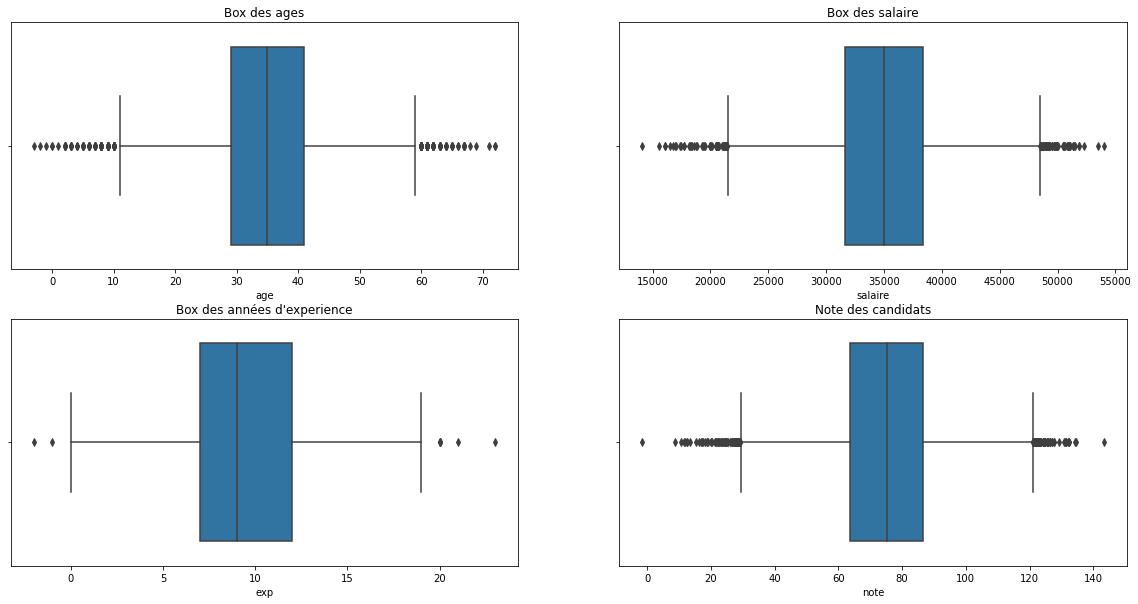

In [254]:
fig,ax = plt.subplots(2,2,figsize=(20,10))
sns.boxplot(data=data,x="age",ax=ax[0,0]).set_title("Box des ages")
sns.boxplot(data=data,x="salaire",ax=ax[0,1]).set_title("Box des salaire")
sns.boxplot(data=data,x="exp",ax=ax[1,0]).set_title("Box des années d'experience")
sns.boxplot(data=data,x="note",ax=ax[1,1]).set_title("Note des candidats")

### Indentification des Valeurs aberrantes par la methode IQR

In [255]:
def outlierdetermin(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    born_inf = Q1 - 1.5*IQR
    born_sup = Q3 + 1.5*IQR
    print(f"les valeurs aberrantes de {column} \n")
    print(data[(data[column] < born_inf) | (data[column] > born_sup)])

In [256]:
outlierdetermin(data,"age")
outlierdetermin(data,"salaire")
outlierdetermin(data,"exp")
outlierdetermin(data,"note")

les valeurs aberrantes de age 

            date couleur des yeux   age   exp  salaire sexe   diplome  \
75    2014-12-13            Hazel  61.0   9.0  32275.0    M    master   
142   2011-04-25             Bleu  65.0  10.0  38355.0    F   licence   
164   2011-02-18            Hazel  10.0   9.0  38767.0    F    master   
258   2011-01-10           Marron   8.0  10.0  44530.0    F   licence   
278   2011-09-20            Hazel  62.0   8.0  42190.0    M   licence   
...          ...              ...   ...   ...      ...  ...       ...   
19636 2014-01-09           Marron  60.0  12.0  29747.0    F  doctorat   
19655 2010-09-27           Marron  62.0  15.0  36727.0    M    master   
19673 2011-01-17             Bleu  61.0  17.0  29235.0    M    master   
19714 2014-02-04           Marron   6.0   7.0  35130.0    F    master   
19901 2010-12-08            Hazel   6.0   8.0  38359.0    M       bac   

               métier   note dispo  embauche  ville d'origine   annee  
75     Data Scienti

Nous constatons qu'il y'a pas mal de valeurs aberrantes dans nos données pour le moment nous allons travailler avec ces données. 
Nous prendrons compte que certains modeles sont sensibles aux valeurs aberrentes comme la Regression linéaire et on va eviter ces modeles pour notre analyse.

# Exploration des données

Dans cette partie,nous allons explorer notre bas de données pour comprendre le processus de recrutement pour apporter des explications claires sur le recrutement

## Analyses Univariées

### Analyse univariée des Variable Qualitatives

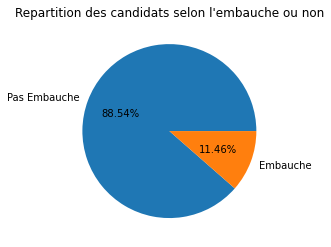

In [257]:
plt.pie(x=data["embauche"].value_counts(),labels=["Pas Embauche","Embauche"],autopct="%1.2f%%")
plt.title("Repartition des candidats selon l'embauche ou non")
plt.show()

On constate sur ce graphe que la majorité des candidats n'ont pas été embauchés seulement 11.46% ont été embauchés

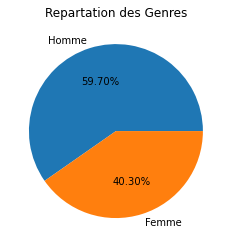

In [258]:
#Repartition des Genres
plt.pie(data['sexe'].value_counts(),labels=["Homme","Femme"],autopct="%1.2f%%")
plt.title("Repartation des Genres")
plt.show()

Ce graphe nous montre que la majoririté des candidats sont des hommes soit 59.70% des candidats contre 40.30% de femmes parmi les Candidats

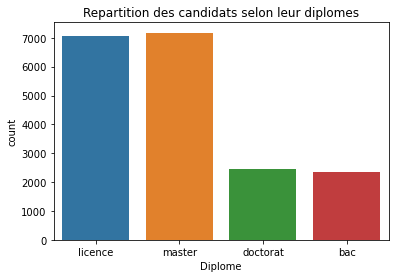

In [259]:
#Distribution des diplomes
sns.countplot(data=data,x="diplome")
plt.xlabel("Diplome")
plt.ylabel("count")
plt.title("Repartition des candidats selon leur diplomes")
plt.show()

Ce graphe nous montre que les candidats sont généralement titulaire d'un Master ou d'une Licence un peu moins en Doctorat et Bac

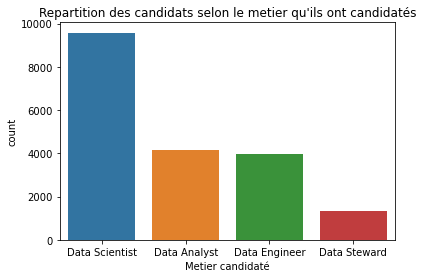

In [260]:
sns.countplot(data=data,x="métier")
plt.xlabel("Metier candidaté")
plt.ylabel("count")
plt.title("Repartition des candidats selon le metier qu'ils ont candidatés")
plt.show()

Sur ce graphe,on vois que la majorité des candidats candidatent au métier de Data Scientist,un peu moins aux métiers de data Analyst et Data Engineer et seulement quelque uns au meétier de Data Steward

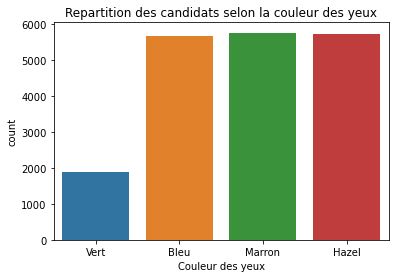

In [261]:
sns.countplot(data=data,x="couleur des yeux")
plt.xlabel("Couleur des yeux")
plt.ylabel("count")
plt.title("Repartition des candidats selon la couleur des yeux")
plt.show()

Ce graphe nous montre que les candidats ont tendance à avoir généralement les yeux de couleur Marron,Hazel ou Blue et un peu des yeux vert  

In [262]:
def ville(numero):
    villes = {
        1 : "Paris",
        2 : "Nancy",
        3 : "Lyon",
        4 : "Marseille",
        5 : "Barcelone",
        6 : "Séville",
        7 : "Madrid",
        8 : "Valence",
        9 : "New York",
        10 : "San Francisco",
        11 : "Miami",
        12 : "Chicago",
        13 : "Los Angeles",
        14 : "Washington",
        15 : "Las Vegas"
    }
    return villes[numero]

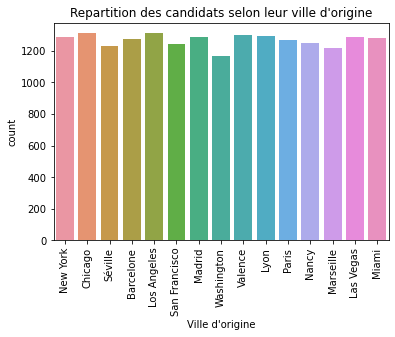

In [263]:
daVill={}
daVill['ville'] =  data["ville d'origine"].apply(ville)
daVill["ville d'origine"] = data["ville d'origine"]
sns.countplot(data = daVill,x='ville')
plt.xticks(rotation=90)
plt.xlabel("Ville d'origine")
plt.ylabel("count")
plt.title("Repartition des candidats selon leur ville d'origine")
plt.show()

Sur ce graphe nous pouvons voir que les candidat sont issus de pratiquement de toutes les villes méme s'ils provienneent plus des ville comme Lyon,Valence,Los Angeles,Chicago,Madrid,Miami et un peu moin dans les autres villes comme Barcelone,New york,San Francisco,Paris et un peu moins pour le reste comme Marseille ou Washington

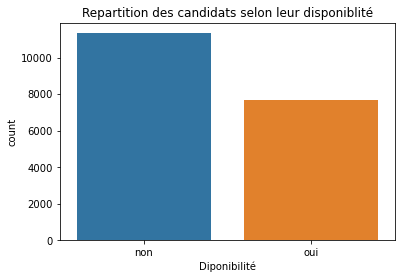

In [264]:
sns.countplot(data = data,x="dispo")
plt.xlabel("Diponibilité")
plt.ylabel("count")
plt.title("Repartition des candidats selon leur disponiblité")
plt.show()

sur ce graphe nous pouvons voir que les candidats sont généralement indisponibles.

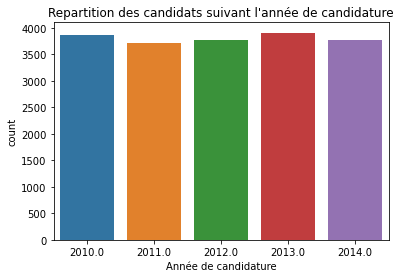

In [265]:
sns.countplot(data = data,x="annee")
plt.xlabel("Année de candidature")
plt.ylabel("count")
plt.title("Repartition des candidats suivant l'année de candidature")
plt.show()

On voit sur ce graphe qu'il y'a eu plus de candidature en 2013 et 2010 un peu moin en 2014,2011 et en 2012 

### Analyse univariée des variables quantitatives

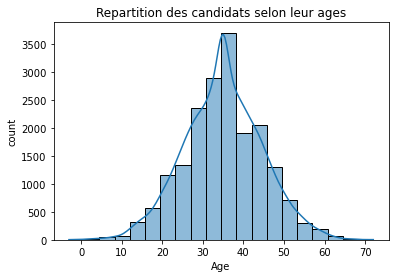

In [266]:
#Distribution des ages
sns.histplot(data=data,x="age",kde=True,bins=20)
plt.xlabel("Age")
plt.ylabel("count")
plt.title("Repartition des candidats selon leur ages")
plt.show()

Sur ce graphe on a la majorité des candidats qui sont agés entre 30 et 40 ans

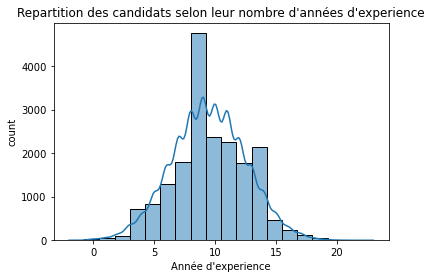

In [267]:
#Distribution des ages
sns.histplot(data=data,x="exp",kde=True,bins=20)
plt.xlabel("Année d'experience")
plt.ylabel("count")
plt.title("Repartition des candidats selon leur nombre d'années d'experience")
plt.show()

Sur ce graphe on voit que la majorité des candidats ont entre 5 et 10 d'années d'experience

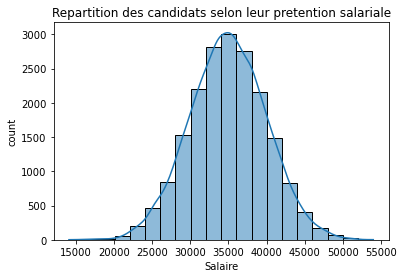

In [268]:
#Distribution des ages
sns.histplot(data=data,x="salaire",kde=True,bins=20)
plt.xlabel("Salaire")
plt.ylabel("count")
plt.title("Repartition des candidats selon leur pretention salariale")
plt.show()

On peut voir sur ce graphe que la majorité des candidats prétendent à un salaire entre 30000 et 40000

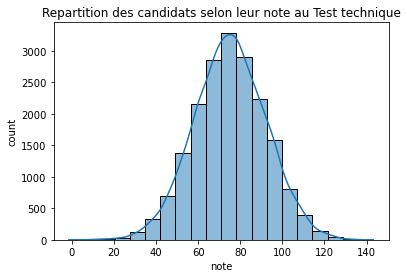

In [269]:
#Distribution des ages
sns.histplot(data=data,x="note",kde=True,bins=20)
plt.xlabel("note")
plt.ylabel("count")
plt.title("Repartition des candidats selon leur note au Test technique")
plt.show()

On voit sur ce graphe que la majorité des candidats ont des notes entre 60 et 80 aux tests techniques

### Résumé des analyses univariées

Dans cette partie de notre travail nous avons fait une analyse sur chaque variable et cela nous permet de faire le conclusions suivantes :
   - D'abord pour ce qui est de l'embauche,on a un faible nombre de candidats qui ont été embauchés (11%).
   - Il y'a plus d'Homme que de Femme parmi les candidats.
   - La mojorité des candidats postulent pour les metier de Data Scientist et moin pour le métier de Data Steward
   - Les Candidats sont généralement titulaire d'un Master ou d'une Licence (on a plus de titulaire en Master)
   - Les candidats ont généralement des yeux de couleur Maron,Blue ou Hazel et un peu de couleurs vert
   - Les Candidats sont issus généralement de toutes les ville méme s'ils proviennent plus dans les villes comme Lyon,Valence,Los Angeles,Chicago,Madrid et un peu moin dans les villes comme Barcelone,New york,Miami,Paris et un peu pour le reste comme Marseille ou Washington
   - Les candidats sont en général indisponibles.
   - Il y'a eu plus de candidats en 2013 et 2010 et un peu moin les autres années
   - Les candidats sont généralement agés entre 30 et 40 ans
   - Les candidats ont généralement entre 5 et 10 d'années d'experience
   - Les candidats demandent en général un salaire entre 30000 et 40000
   - Les candidats ont généralement une note comprise entre 60 et 80 sur les Test techniques

# Analyses Bivariées

## Analyses bivariées selon la viariable expliquée embauche

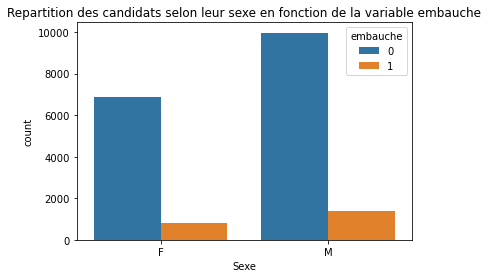

In [270]:
sns.countplot(x='sexe',data=data,hue="embauche")
plt.xlabel("Sexe")
plt.ylabel("count")
plt.title("Repartition des candidats selon leur sexe en fonction de la variable embauche")
plt.show()

Sur ce gaphe on voit qu'il y'a eu plus de recrutement d'hommes que d femmes

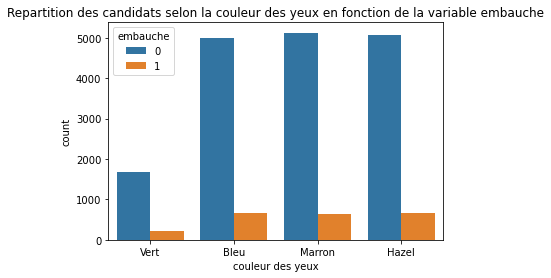

In [271]:
sns.countplot(x='couleur des yeux',data=data,hue="embauche")
plt.xlabel("couleur des yeux")
plt.ylabel("count")
plt.title("Repartition des candidats selon la couleur des yeux en fonction de la variable embauche")
plt.show()

Sur ce graphe on peut voir que l'on a recruté généralement les candidats ayant la couleur des yeux Blue ou Hazel ou Maron que avec les yeux Vert

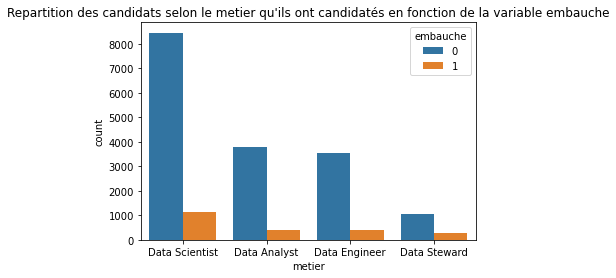

In [272]:
sns.countplot(x='métier',data=data,hue="embauche")
plt.xlabel("metier")
plt.ylabel("count")
plt.title("Repartition des candidats selon le metier qu'ils ont candidatés en fonction de la variable embauche")
plt.show()

Sur ce graphe nous pouvons voir que : Il y'a eu plus de recrutement pour le metier de Data Scientist, un peu moin pour le Data Engineer et Data Analyst et peu en Data Steward

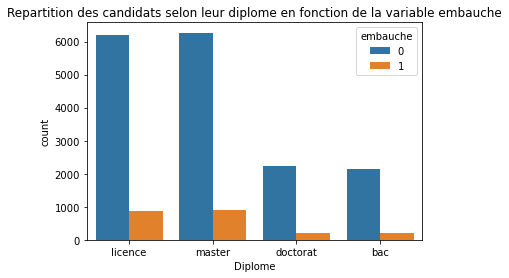

In [273]:
sns.countplot(x='diplome',data=data,hue="embauche")
plt.xlabel("Diplome")
plt.ylabel("count")
plt.title("Repartition des candidats selon leur diplome en fonction de la variable embauche")
plt.show()

On peut voir sur ce graphe que les candidats recrutés sont généralement titulaires d'un Master ou d'une Licence

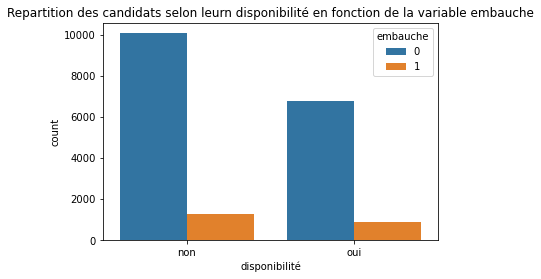

In [274]:
sns.countplot(x='dispo',data=data,hue="embauche")
plt.xlabel("disponibilité")
plt.ylabel("count")
plt.title("Repartition des candidats selon leurn disponibilité en fonction de la variable embauche")
plt.show()

On voit sur ce graphe que les candidats recrutés etaient en général plus indisponibles

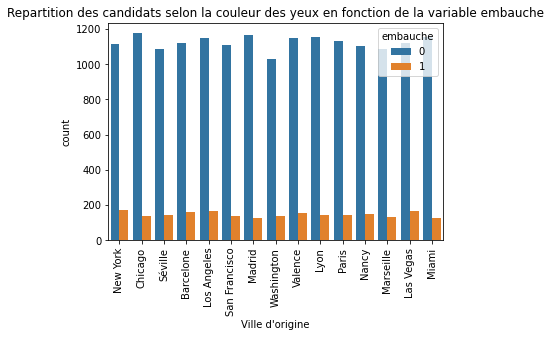

In [275]:
sns.countplot(x=daVill['ville'],data=data,hue="embauche")
plt.xlabel("Ville d'origine")
plt.ylabel("count")
plt.title("Repartition des candidats selon la couleur des yeux en fonction de la variable embauche")
plt.xticks(rotation=90)
plt.show()

Sur ce graphe on peut voir que l'on a recruter plus les candidats provenant de New York,Las Vegas,Los Angeles,Barcelone,Valence,Nancy et un peu moin dans les autre villes

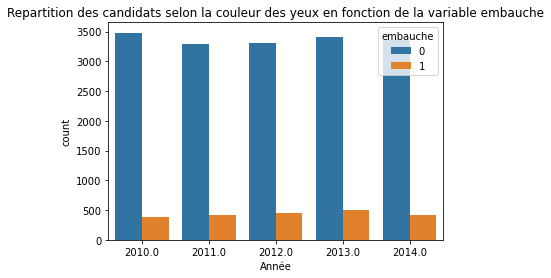

In [276]:
sns.countplot(x='annee',data=data,hue="embauche")
plt.xlabel("Année")
plt.ylabel("count")
plt.title("Repartition des candidats selon la couleur des yeux en fonction de la variable embauche")
plt.show()

Il y'a eu plus de recrutement en 2013 que les autres années

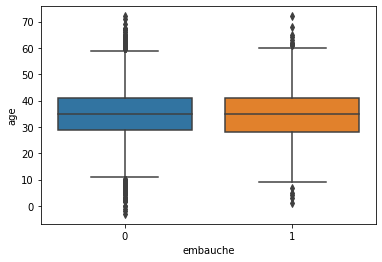

In [277]:
sns.boxplot(x="embauche",y="age",data=data)
plt.xlabel("embauche")
plt.show()

Sur ce graphe nous pouvons voir que les candidats embauchés et non embauchés avaient les mémes moyenne d'age

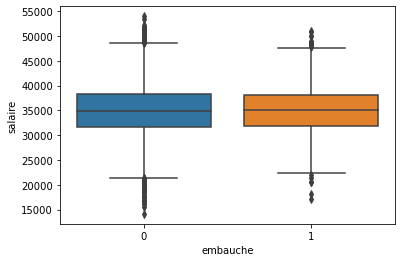

In [278]:
sns.boxplot(x="embauche",y="salaire",data=data)
plt.xlabel("embauche")
plt.show()

Sur ce graphe on peut voir que les candidats qui ont été embauchés et les autres non embauchés prétendaient en moyenne aux méme revenus soit 35000 pour les deux

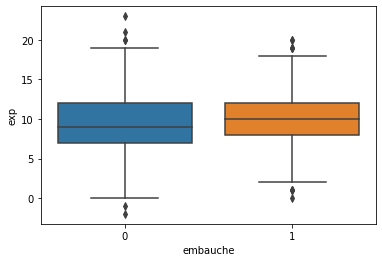

In [279]:
sns.boxplot(x="embauche",y="exp",data=data)
plt.xlabel("embauche")
plt.show()

Sur ce graphe nous pouvons voir que les candidats embauchés avaient légérement plus d'années d'experience par rapport au autres non embauchés.

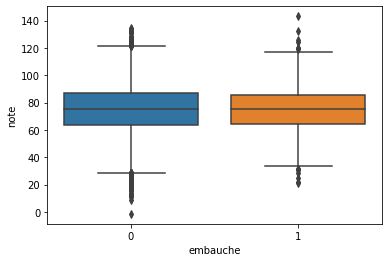

In [280]:
sns.boxplot(x="embauche",y="note",data=data)
plt.xlabel("embauche")
plt.show()

Sur ce graphe nous pouvons voir que les candidats embauchés et non embauchés avaient en moyenne les mémes notes sur les Test Techniques

### Résumé analyse bivariées avec la variable embauche

Aprés l'analyse bivariée menée sur les candidats en fonction de la variable embauche, nous pouvons faire les constats suivants :
   - On a recruté plus d'hommes que de Femmes
   - Les candidats embauchés avaient en général la couleur des yeux Marron,Bleu ou Hazel
   - Les candidats embauchés etaient généralement titulaires d'un diplome de Master ou d'une Licence
   - On a embauché plus les candidats qui étaient indisponible
   - Les candidats provenant des villes comme New York,Los Angeles, Barcelone,Nancy et Valence ont été plus embauchés
   - Il y'a eu plus d'embauche en 2013
   - Les candidats (embauchés ou non) avaient en général la méme moyenne d'age (35 ans)
   - Les Candidats embauchés avaient plus d'années d'experience en général
   - Les candidats (embauchés ou non) avaient en moyenne les mémes notes sur les Test Techniques
   - Les candidats (embauchés ou non) pretendaient en moyenne aux mémes salaires ( 35000)

## Analyses bivariées entre les variable Quantitatives

In [281]:
dataP = data.select_dtypes('float')
dataP = dataP.drop(["annee"],axis=1)

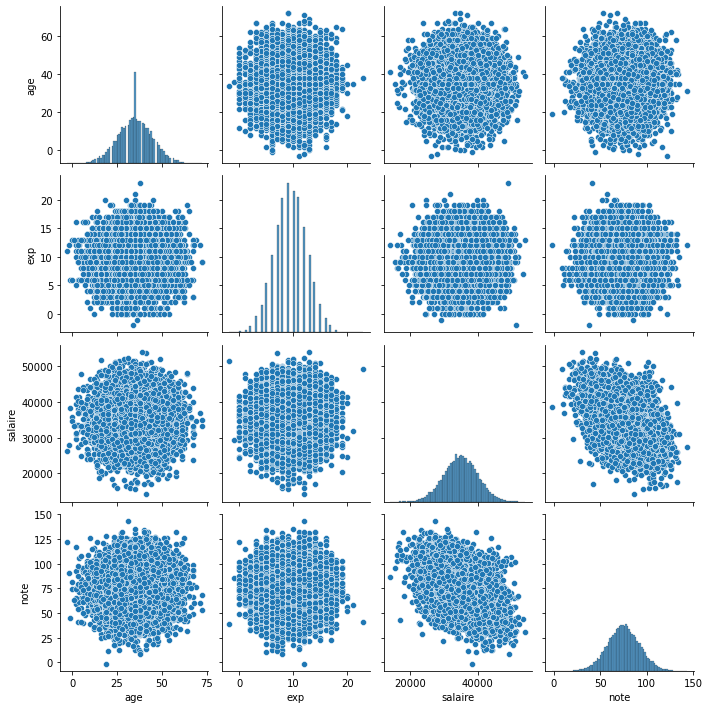

In [282]:
sns.pairplot(data=dataP)

En analysant ces graphes nous pouvons voir qu'il n'y pratiquement pas vraiment de correlation entre les variables mais il y'en a deux qui semble avoir une correlation notamment les variables salaire et note.
Nous allons faire des tests statistiques pour confirmer ou infirmer ces hypothéses

In [283]:
#verification de la normalité des variable quantitatives
for var in dataP.columns:
    _,p_value = shapiro(data[var])
    print(f"P-value de la normalité de {var} est : {p_value}")

P-value de la normalité de age est : 1.705596384612984e-14
P-value de la normalité de exp est : 4.088602614320157e-33
P-value de la normalité de salaire est : 0.7374891638755798
P-value de la normalité de note est : 0.50556480884552


/home/assane/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


On a verifié la normalité des variables et on vois que les variables age et exp ne suivent pas une loi normale avec leur p_value < 0.05 et que les variable salaire et note suivent une loi normal.
Aprés avoir verifié la normalité de nos variable nous allons effectuer les test de Pearson pour verifier s'il existe un correlation lineaire entre les variable salaire et note.
A noter que l'on ne peut pas faire le test de Pearson pour les variables age et exp vu qu'elles ne suivent pas une loi normale.
Aprés on fera les test de Spearman et de Kendall pour verifier les correlations monotoniques entre les varibles.

In [284]:
r,p_value = pearsonr(data['salaire'],data['note'])
print(f"Test de pearson entre salaire et note : (r = {r} et p-value = {p_value})")

Test de pearson entre salaire et note : (r = -0.44789425361016244 et p-value = 0.0)


Aprés le test de Pearson entre les variables salaire et note on a un p_value = 0.0 ce qui signifie qu'il y'a une forte correlation entre les variables et avec le r negatif ce qui fait qu'on a une correlation negative forte entre les deux variable c'est à dire si l'un augmente l'autre diminu et cela est visible sur le nuage de point entre les deux variable (voir graphe)

### Test de spearman

In [285]:
print(f"Test de spearman entre age et exp : {spearmanr(data['age'],data['exp'])}")
print(f"Test de spearman entre age et salaire : {spearmanr(data['age'],data['salaire'])}")
print(f"Test de spearman entre age et note : {spearmanr(data['age'],data['note'])}")
print(f"Test de spearman entre salaire et exp : {spearmanr(data['salaire'],data['exp'])}")
print(f"Test de spearman entre salaire et note : {spearmanr(data['salaire'],data['note'])}")
print(f"Test de spearman entre note et exp : {spearmanr(data['note'],data['exp'])}")

Test de spearman entre age et exp : SpearmanrResult(correlation=-0.004309317753301661, pvalue=0.5523179436900056)
Test de spearman entre age et salaire : SpearmanrResult(correlation=-0.0006479879618320086, pvalue=0.9287938569529112)
Test de spearman entre age et note : SpearmanrResult(correlation=-0.005725520818437148, pvalue=0.4297618880460189)
Test de spearman entre salaire et exp : SpearmanrResult(correlation=0.006562092089299938, pvalue=0.3654802382466529)
Test de spearman entre salaire et note : SpearmanrResult(correlation=-0.425120254080542, pvalue=0.0)
Test de spearman entre note et exp : SpearmanrResult(correlation=-0.01237271032863087, pvalue=0.0879418511951942)


Le test de spearman confirme la correlation negative forte entre les variables salaire et note que le test de pearson nous a montré et nous montre aussi qu'il n'y a aucune correlation entre les variables age et exp,entre exp et salaire,entre age et salaire,entre age et note et entre note et exp avec des p_value > 0.05 cela confirme l'hypotése 0  

### Test de Kendall

In [286]:
print(f"Test de kendall entre age et exp : {kendalltau(data['age'],data['exp'])}")
print(f"Test de kendall entre age et salaire : {kendalltau(data['age'],data['salaire'])}")
print(f"Test de kendall entre age et note : {kendalltau(data['age'],data['note'])}")
print(f"Test de kendall entre salaire et exp : {kendalltau(data['salaire'],data['exp'])}")
print(f"Test de kendall entre salaire et note : {kendalltau(data['salaire'],data['note'])}")
print(f"Test de kendall entre note et exp : {kendalltau(data['note'],data['exp'])}")

Test de kendall entre age et exp : KendalltauResult(correlation=-0.003078033983338401, pvalue=0.5484395713907897)
Test de kendall entre age et salaire : KendalltauResult(correlation=-0.0004402183770560067, pvalue=0.9285427830869912)
Test de kendall entre age et note : KendalltauResult(correlation=-0.003882131950686858, pvalue=0.4290610632907993)
Test de kendall entre salaire et exp : KendalltauResult(correlation=0.0045727780480706364, pvalue=0.36534837737968706)
Test de kendall entre salaire et note : KendalltauResult(correlation=-0.29363526010803237, pvalue=0.0)
Test de kendall entre note et exp : KendalltauResult(correlation=-0.008628165450144195, pvalue=0.08764991049786354)


Le test de Kendall confirme la correlation negative forte entre les variables salaire et note que les test de pearson et Spearman ont montrés.
Le constat sur ces analyses et tests statisques est que les variables age et exp ne suivent pas une loi normale(et c'est d'ailleur visible sur leur histogramme) et qu'ils n'ont aucune correlation ni entre eux et egalement avec aucun des variable note et salaire qui ont eux une correlation négative forte entre eux 

### Analyses bivariées entre les variable quantitatives

Dans cette partie nous allons faire des analyses graphiques et egalement des tests statistiques pour voir les correlation qu'il y'a entre les variable qualitatives

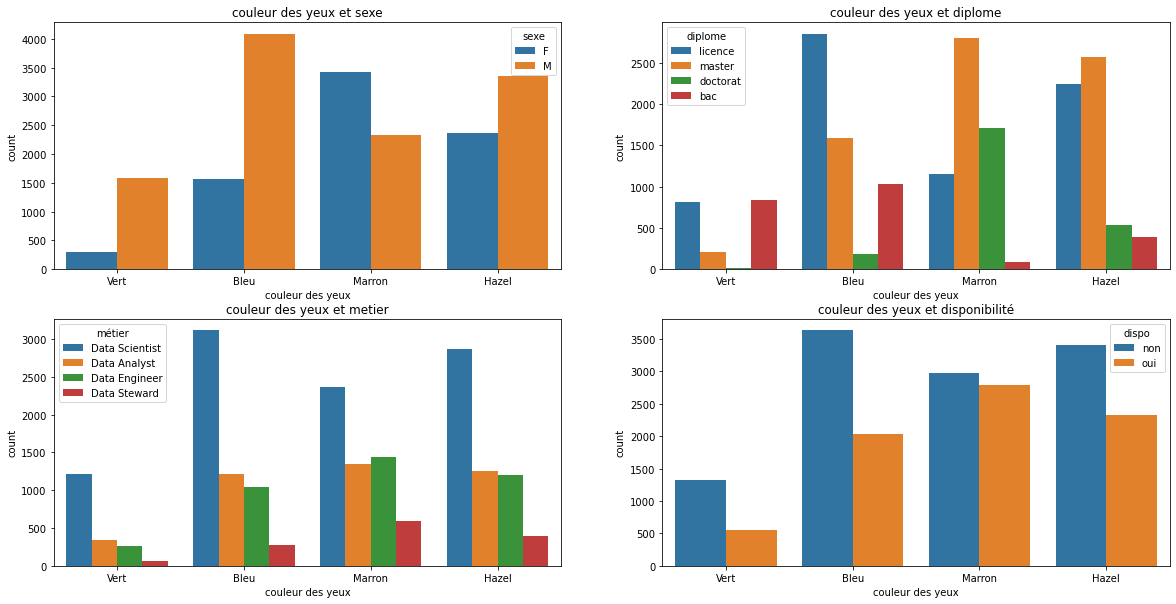

In [287]:
#Correlation entre la variable couleur des yeux et les autres
fig,ax = plt.subplots(2,2,figsize=(20,10))
sns.countplot(x="couleur des yeux",data=data,hue="sexe",ax=ax[0,0]).set_title("couleur des yeux et sexe")
sns.countplot(x="couleur des yeux",data=data,hue="diplome",ax=ax[0,1]).set_title("couleur des yeux et diplome")
sns.countplot(x="couleur des yeux",data=data,hue="métier",ax=ax[1,0]).set_title("couleur des yeux et metier")
sns.countplot(x="couleur des yeux",data=data,hue="dispo",ax=ax[1,1]).set_title("couleur des yeux et disponibilité")
plt.show()
#sns.countplot(x="couleurs des yeux",data=data,hue="ville d'orig",ax=[0,0]).set_title("couleur des yeux et ville d'origine")

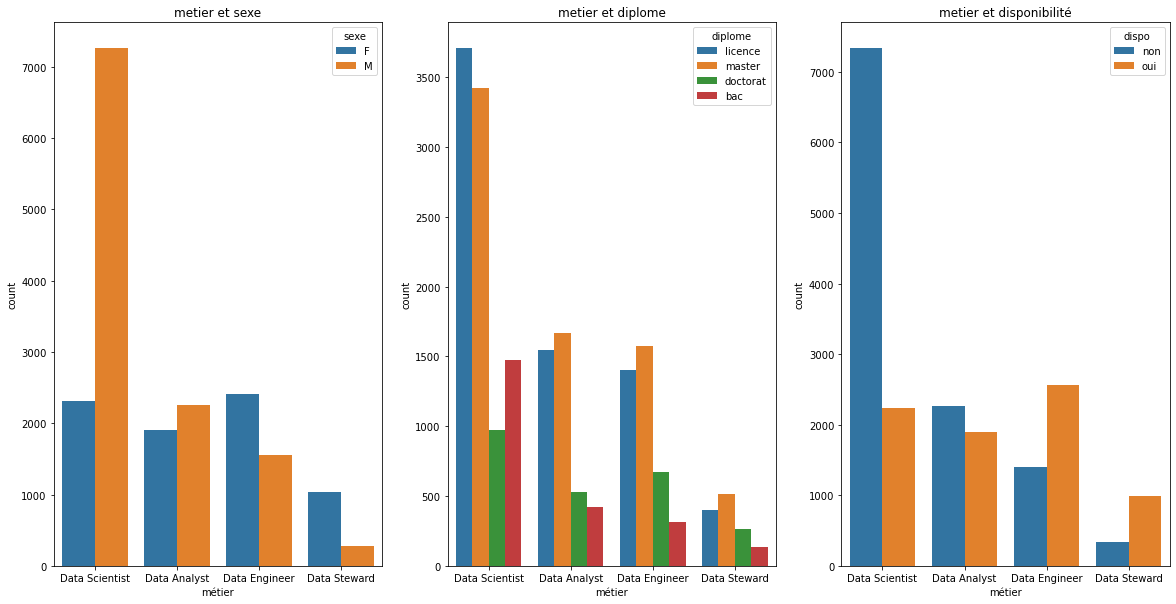

In [288]:
#Correlation entre la variable metier et les autres
fig,ax = plt.subplots(1,3,figsize=(20,10))
sns.countplot(x="métier",data=data,hue="sexe",ax=ax[0]).set_title("metier et sexe")
sns.countplot(x="métier",data=data,hue="diplome",ax=ax[1]).set_title("metier et diplome")
sns.countplot(x="métier",data=data,hue="dispo",ax=ax[2]).set_title("metier et disponibilité")
plt.show()

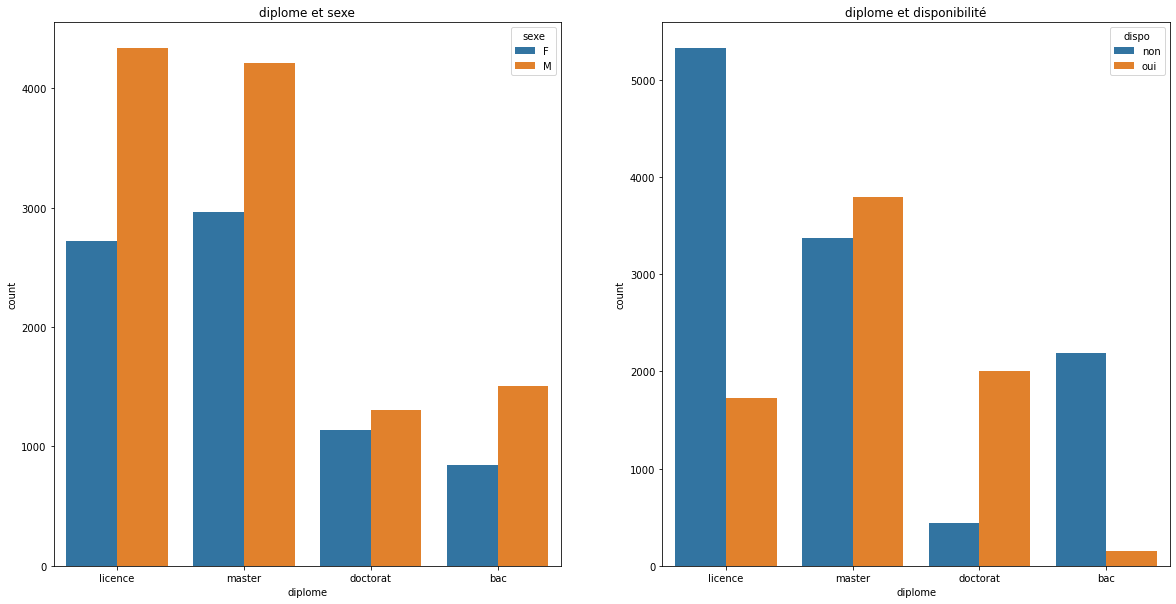

In [289]:
#Correlation entre la variable diplome et les autres
fig,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x="diplome",data=data,hue="sexe",ax=ax[0]).set_title("diplome et sexe")
sns.countplot(x="diplome",data=data,hue="dispo",ax=ax[1]).set_title("diplome et disponibilité")
plt.show()

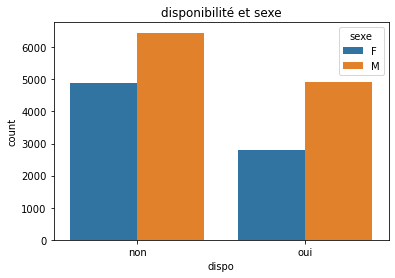

In [290]:
#Correlation entre la variable metier et les autres
sns.countplot(x="dispo",data=data,hue="sexe").set_title("disponibilité et sexe")
plt.show()

- les hommes ont généralement des yeux de couleur Blue et que les Femmes ont généralement des yeux Marron
- les titulaires du diplome de Licence ont généralement des yeux de couleur Blue,les titulaires de Master ont des yeux de couleur Marron,les titulaires de Doctorat des yeux de couleur Marron et les titulaires de Bac ont en général des yeux de couleur Bleu
- Généralement les Data Scientist ont les yeux de couleur Bleu,les Data Analyst des yeux de couleur Marron,les Data Engineer des yeux de couleur Marron et les Data Steward des yeux de couleur Marron
- Les candidats au yeux Bleu sont en général plus indisponibles
- les data scientist sont généralement des hommes,ils sont généralement titulaire d'une Licence ou d'un Master et sont généralement  indisponibles
- Les data Analyst sont généralement des hommes,ils sont titulaires d'un Master ou d'une Licence et sont indisponible en général
- Les data Engineer sont généralement des femmes,elles sont titulaires d'un Master ou d'une Licence et sont disponible en général
- Les data Steward sont généralement des femmes,elles sont titulaires d'un Master ou d'une Licence et sont disponible en général
- Les Hommes et les Femmes sont généralement titulaires d'un Master ou d'une Licence
- Les Titulaire de Master sont en général disponible par contre les titulaires d'une Licence le sont moin
- Les candidats sont généralement indisponibles

Nous allons utiliser des tests statistiques pour confirmer ou infirmer les hypothéses que l'on a listés ci-dessus

In [291]:
dataCali = data.select_dtypes('object').columns.tolist()
#test de chi2
for a in range(len(dataCali)):
    m=a
    for m in range(a,len(dataCali)-1):
        name1= str(dataCali[a])
        name2 = str(dataCali[m+1])
        #print(data[name1],data[name2])
        contegency_table = pd.crosstab(data[name1],data[name2])
        n = data.shape[0]
        min_dim = min(contegency_table.shape)-1
        #cramer_v = np.sqrt(chi2_stat / (n * min_dim))
        chi2,p_value,_,_ = chi2_contingency(contegency_table)
        #nous aussi calculé le coefficient de T-chuprow
        tschuprow = np.sqrt(chi2/(n * min_dim))
        
        print(f"---------------le resultat du teste de chi entre les variables {name1} et {name2} est ----------------")
        print(f"statistique chi : {chi2}")
        print(f"p_value : {p_value}")
        print(f"le coefficient de tschuprow est : {tschuprow}")
        if p_value < 0.05 :
            print(f"les variables {name1} et {name2} ont une association")
            if tschuprow < 0.5 :
                print(f"l'intensité de l'asociation n'est pas importantes entre les variables {name1} et {name2}")
            else:
                print(f"l'intensité de l'asociation est importantes entre les variables {name1} et {name2}")
        else:
            print(f"les variables {name1} et {name2} n'ont pas d'association")
        print("----------------------------------------------------------------------------------")
        print("\n")

---------------le resultat du teste de chi entre les variables couleur des yeux et sexe est ----------------
statistique chi : 1696.8923395745587
p_value : 0.0
le coefficient de tschuprow est : 0.2986829772989439
les variables couleur des yeux et sexe ont une association
l'intensité de l'asociation n'est pas importantes entre les variables couleur des yeux et sexe
----------------------------------------------------------------------------------


---------------le resultat du teste de chi entre les variables couleur des yeux et diplome est ----------------
statistique chi : 5853.904690483706
p_value : 0.0
le coefficient de tschuprow est : 0.32029158120767376
les variables couleur des yeux et diplome ont une association
l'intensité de l'asociation n'est pas importantes entre les variables couleur des yeux et diplome
----------------------------------------------------------------------------------


---------------le resultat du teste de chi entre les variables couleur des yeux et méti

Les hypothéses que nous avons levés apres analyse des graphique bivariées de nos variables qualitatives ont été confirmées avec le Test de Tschuprow
Sur les resulats des Tests de Tschuprow,nous pouvons voir qu'il y'a généralement des association entre les varibales sexe,diplome,metier,couleur des yeux et la disponibilité et que ces associations ne sont pas suffisament significatives pour pouvoir conclure une dependance entre eux

# Analyses bivariées entre variables Quantitatives et Qualitatives

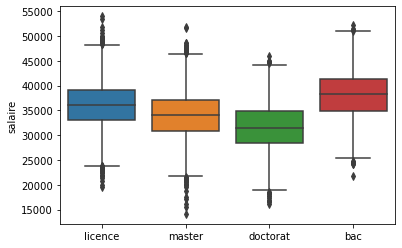

In [292]:
sns.boxplot(x="diplome",y="salaire",data=data)
plt.xlabel("")
plt.show()

Sur graphique on peut voir que les titulaire d'un diplome de Bac pretendent à des salaire plus élévés suivit des titumaire de Licence et de Master et en dernier les titulaires de Doctorat
Nous allons faire le test kruskal pour verifier cette hypothése

In [293]:
licence = data.loc[data['diplome']=="licence",'salaire']
master = data.loc[data['diplome']=="master",'salaire']
doctorat = data.loc[data['diplome']=="doctorat",'salaire']
bac = data.loc[data['diplome']=="bac",'salaire']
krus_stat,p_value = kruskal(licence,master,doctorat,bac)
print(f"stat : {krus_stat} - p-value : {p_value}")

stat : 2627.369172778931 - p-value : 0.0


Le Test de Kruskall-Wallis confirme notre hypothése selon laquelle les pretentions salariales dependent du diplomes,les titulaires d'un diplome de Bac pretendent à des salaire plus élévés suivit des titumaire de Licence et de Master et en dernier les titulaires de Doctorat 

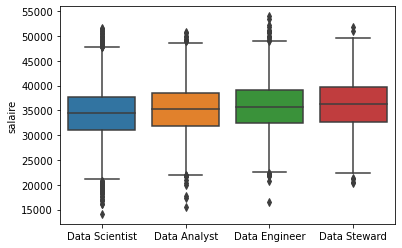

In [294]:
sns.boxplot(x="métier",y="salaire",data=data)
plt.xlabel("")
plt.show()

Sur ce graphe nous pouvons voir que les candidats qui candidatent au metier de Data Steward ont des pretentions salariales plus élevées suivit des Data Engineer,des Data Analyst et en Dernier les Data Scientist

In [295]:
ds = data.loc[data['métier']=="Data Scientist",'salaire']
da = data.loc[data['métier']=="Data Analyst",'salaire']
de = data.loc[data['métier']=="Data Engineer",'salaire']
ds = data.loc[data['métier']=="Data Steward",'salaire']
krus_stat,p_value = kruskal(ds,da,de,ds)
print(f"stat : {krus_stat} - p-value : {p_value}")

stat : 49.92120034981563 - p-value : 8.303931354157561e-11


Le Test de Kruskall-Wallis confirme notre hypothése,les Data scientist prétendent à des salaires moin élevé et que les Data Steward prétendent à des salaire plus élevés.
On peut dire que la pretention salariale depend du métier

<AxesSubplot:xlabel='annee', ylabel='salaire'>

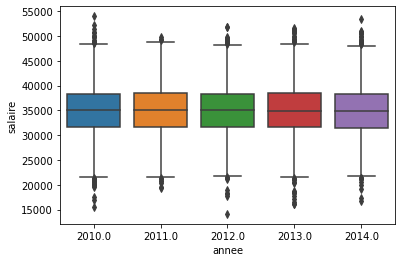

In [296]:
sns.boxplot(x="annee",y="salaire",data=data)

On peut voir sur ce graphe que l'on a les mémes pretentions salariales pour pour chaque année

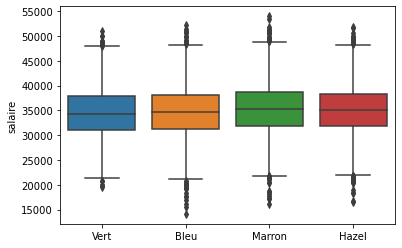

In [297]:
sns.boxplot(x="couleur des yeux",y="salaire",data=data)
plt.xlabel("")
plt.show()

On peut voir sur ce graphe que les candidats aux yeux de couleur Marron prétendent à des salaires plus élevés,suivit ceux avec des yeux de couleur Hazel ensuite ceux avec les yeux Bleu et en dernier ceux avec des yeux de couleur vert

In [298]:
cv = data.loc[data['couleur des yeux']=="Vert",'salaire']
cb = data.loc[data['couleur des yeux']=="Bleu",'salaire']
ch = data.loc[data['couleur des yeux']=="Hazel",'salaire']
cm = data.loc[data['couleur des yeux']=="Marron",'salaire']
krus_stat,p_value = kruskal(cv,cb,ch,cm)
print(f"stat : {krus_stat} - p-value : {p_value}")

stat : 76.41368383227694 - p-value : 1.8033536321625687e-16


Le Test de Kruskall confirme notre hypothése selon laquelle les pretentions salariales sont liées à la couleur des yeux

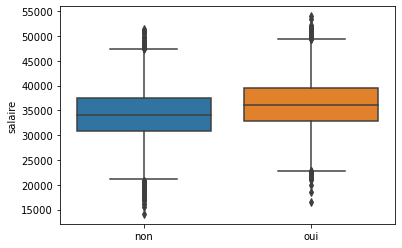

In [299]:
sns.boxplot(x="dispo",y="salaire",data=data)
plt.xlabel("")
plt.show()

On peut voir sur ce graphe que les candidats disponible pretendent à des salaires plus élévés

In [300]:
dispo = data.loc[data['dispo']=="oui",'salaire']
ndispo = data.loc[data['dispo']=="non",'salaire']
krus_stat,p_value = kruskal(dispo,ndispo)
print(f"stat : {krus_stat} - p-value : {p_value}")

stat : 617.8069003622056 - p-value : 2.2425890135783086e-136


Le resultat du Test confirme notre hypothése.
Les candidats disponibles prétendent à un salaire plus élevé que les candidats qui ne le sont pas

<AxesSubplot:xlabel='métier', ylabel='note'>

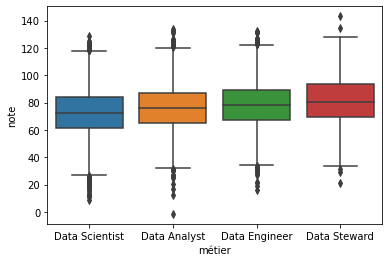

In [301]:
sns.boxplot(data=data,x="métier",y="note")

Sur ce graphe nous pouvons voir que les candidats qui candidatent au metier de Data Steward ont des notes plus élevées aux Tests Technique suivit des Data Engineer,des Data Analyst et en Dernier les Data Scientist

In [302]:
ds = data.loc[data['métier']=="Data Scientist",'note']
da = data.loc[data['métier']=="Data Analyst",'note']
de = data.loc[data['métier']=="Data Engineer",'note']
ds = data.loc[data['métier']=="Data Steward",'note']
krus_stat,p_value = kruskal(ds,da,de,ds)
print(f"stat : {krus_stat} - p-value : {p_value}")

stat : 146.566976061548 - p-value : 1.449696286602854e-31


Le resultat du Test de Kruskall-Will confirme notre hypothese.
Les candidats au metiers de Data Steward reussite le plus au Tests Technique suivit les Data Engineer,les Data Analyst et en dernier les Data Scientist

<AxesSubplot:xlabel='diplome', ylabel='note'>

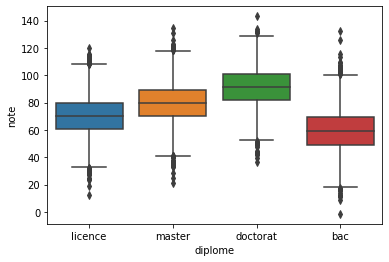

In [303]:
sns.boxplot(data=data,x="diplome",y="note")

Sur ce graphe nous pouvons voir que les titulaires d'un Doctorat ont de notés plus élévés au Tests Technique suivit des diplomés de Master ensuite des diplomés de Licence et en dernier les diplomés d'un Bac

In [304]:
licence = data.loc[data['diplome']=="licence",'note']
master = data.loc[data['diplome']=="master",'note']
doctorat = data.loc[data['diplome']=="doctorat",'note']
bac = data.loc[data['diplome']=="bac",'note']
krus_stat,p_value = kruskal(licence,master,doctorat,bac)
print(f"stat : {krus_stat} - p-value : {p_value}")

stat : 4997.102645454185 - p-value : 0.0


les resultat de Kruskall-Wallis confirme l'hypothése.
En général les titulaires d'un Doctorat ont de notés plus élévés au Tests Technique suivit des diplomés de Master ensuite des diplomés de Licence et en dernier les diplomés d'un Bac

<AxesSubplot:xlabel='sexe', ylabel='salaire'>

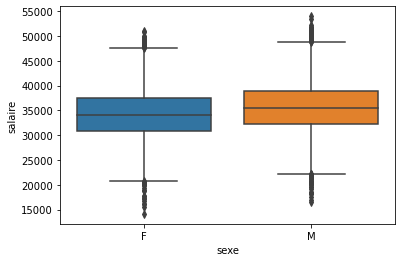

In [305]:
sns.boxplot(data=data,x="sexe",y="salaire")

Sur ce graphe nous pouvons voir que les hommes prétendent à des salaires plus élevés que les femmes

In [306]:
sh = data.loc[data['sexe']=="M",'salaire']
sf = data.loc[data['sexe']=="F",'salaire']
krus_stat,p_value = kruskal(sh,sf)
print(f"stat : {krus_stat} - p-value : {p_value}")

stat : 314.25118204391896 - p-value : 2.5891265761155366e-70


Le ressultat de Test de Kruskall confirme notre intuition.
les hommes prétendent à des salaires plus élevés que les femme

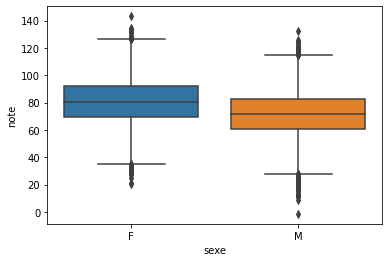

In [307]:
sns.boxplot(data=data,x="sexe",y="note")
plt.ylabel("note")
plt.xlabel("sexe")
plt.show()

sur ce graphique nous pouvons voir que les femmes reussissent plus les Tests Techniques que les hommes

In [308]:
sh = data.loc[data['sexe']=="M",'note']
sf = data.loc[data['sexe']=="F",'note']
krus_stat,p_value = kruskal(sh,sf)
print(f"stat : {krus_stat} - p-value : {p_value}")

stat : 1275.2687599619962 - p-value : 2.6773590533582766e-279


Le resultat du Test confirme notre hypothése
les femmes reussissent plus les Tests Techniques que les hommes

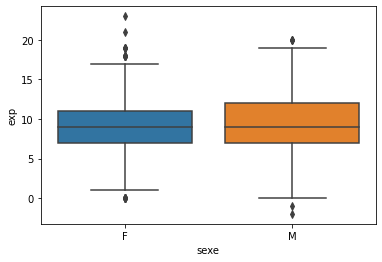

In [309]:
sns.boxplot(data=data,x="sexe",y="exp")
plt.ylabel("exp")
plt.xlabel("sexe")
plt.show()

Sur ce graphique,les hommes ont un plus d'années d'experience que les femmes

In [310]:
sh = data.loc[data['sexe']=="M",'exp']
sf = data.loc[data['sexe']=="F",'exp']
krus_stat,p_value = kruskal(sh,sf)
print(f"stat : {krus_stat} - p-value : {p_value}")

stat : 0.05180978461763689 - p-value : 0.8199435144210974


Le resultat de test de Kruskall-Wallis infirme notre hypothése.C'est a dire il n'y a pas de rapport entre le sexe et le nombre d'année d'experience

# Partie 2

# Utilisation de L'intelligence artificielle pour predire si un candidat sera embauché ou non

## Label Encoding

In [311]:
dataCategoriel = data.select_dtypes('object')
dataCategoriel
label_encoder = LabelEncoder()
for cat in dataCategoriel:
    label_encoder.fit(data[cat].unique())
    data[cat] = label_encoder.transform(data[cat])
    print(cat,data[cat].unique())

couleur des yeux [3 0 2 1]
sexe [0 1]
diplome [2 3 1 0]
métier [2 0 1 3]
dispo [0 1]


# Normalisation

In [312]:
dataQuanti = data.select_dtypes('float').drop("annee",axis=1).columns
dataQuanti
st = StandardScaler()
data[dataQuanti] = st.fit_transform(data[dataQuanti])

In [313]:
data.head()

,date,couleur des yeux,age,exp,salaire,sexe,diplome,métier,note,dispo,embauche,ville d'origine,annee
0,2012-06-02,3,-1.040889,-0.164849,-1.631120,0,2,2,1.279413,0,0,9,2012.0
1,2011-04-21,0,0.000126,1.162804,0.639175,1,2,0,-0.661661,0,0,12,2011.0
2,2012-09-07,0,-0.624483,1.162804,0.047976,1,2,2,0.193767,0,0,9,2012.0
4,2012-08-07,3,0.000126,-1.160588,-1.285470,0,2,1,0.393017,0,0,6,2012.0
5,2014-02-12,2,0.208329,-0.496762,0.717496,1,3,2,-0.685033,0,1,5,2014.0


<AxesSubplot:>

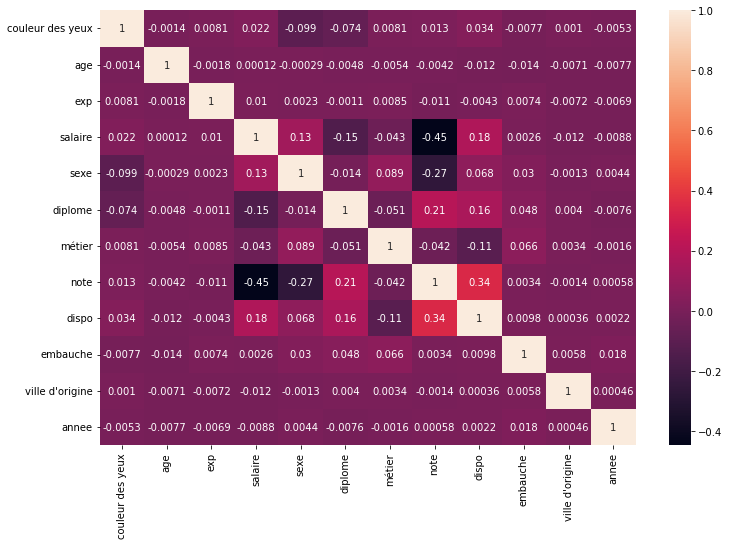

In [314]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

Sur ce matric de correlation, nous pouvons voir la correlation forte négative entre la variable note et salaire comme on n'a pu le constater lors des analyses bivariées effectuées sur ces variables

In [315]:
X =  data.drop(['embauche','annee','date'],axis=1)
X['annee'] = data['date'].dt.year
X['mois'] = data['date'].dt.month
X['jour'] = data['date'].dt.day
Y = data['embauche']

In [316]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Utilisation du model RandomForesClassifier

In [317]:
rfc = RandomForestClassifier(class_weight="balanced")
parametres = {'max_depth' :[2,4,6,8,10],
'n_estimators' :[2,4,6,8],
'max_features' :['auto','sqrt','log2'],
'random_state' :[0,42]}
grid_search = GridSearchCV(rfc,parametres,cv=5)
grid_search.fit(X_train,Y_train)
#on va afficher mes meilleurs parametrers pour notre modele
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 8, 'random_state': 0}


In [318]:
rfc = RandomForestClassifier(random_state=0,max_depth=10,max_features="auto",n_estimators=8)
rfc.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, n_estimators=8, random_state=0)

In [319]:
rfc.score(X_train, Y_train)

0.9148264984227129

In [320]:
y_pred = rfc.predict(X_test)

# Evaluation du model RandomforesClassifier

In [321]:
print("Accuracy score : ",round(accuracy_score(Y_test,y_pred)*100,2),"%")

Accuracy score :  90.54 %


In [322]:
print("F1-score : ",(f1_score(Y_test,y_pred,average="micro")))
print("Precision Score : ",(precision_score(Y_test,y_pred,average="micro")))
print("Recall score : ",(recall_score(Y_test,y_pred,average="micro")))
print("Jaccard Score: ",(jaccard_score(Y_test,y_pred,average="micro")))
print("Log Loss: ",(log_loss(Y_test,y_pred)))

F1-score :  0.9053876478318003
Precision Score :  0.9053876478318003
Recall score :  0.9053876478318003
Jaccard Score:  0.8271308523409364
Log Loss:  3.26779592645335


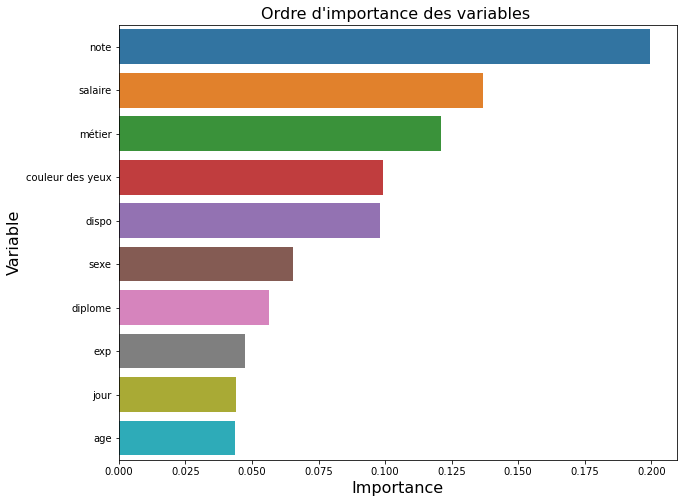

In [323]:
dataFrameResultat = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Importance':rfc.feature_importances_
})
dfi = dataFrameResultat.sort_values(by="Importance",ascending=False)
dfi2 = dfi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=dfi2,x="Importance",y="Feature Name")
plt.title("Ordre d'importance des variables ",fontsize=16)
plt.xlabel("Importance",fontsize=16)
plt.ylabel("Variable",fontsize=16)
plt.show()


In [ ]:
#print("R2 Score: ", r2_score(Y_test, y_pred))
#print("Mean Squared Error: ", mean_squared_error(Y_test, y_pred))
#print("Mean Absolute Error: ", mean_absolute_error(Y_test, y_pred))
#print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred)))

# DecisionTree Classifier

In [325]:
dtree = DecisionTreeClassifier()
parametres = {'max_depth' :[2,4,6,8,10],
'min_samples_split' :[2,4,6,8],
'min_samples_leaf' :[2,4,6,8],
'max_features' :['auto','sqrt','log2'],
'random_state' :[0,42]}
grid_search = GridSearchCV(dtree,parametres,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train,Y_train)
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 0}


In [326]:
dtree = DecisionTreeClassifier(max_depth= 10, max_features = "auto",min_samples_leaf=4,min_samples_split=2, random_state=0)

In [327]:
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_leaf=4,
                       random_state=0)

In [328]:
y_pred = dtree.predict(X_test)

# Evaluation du model DecitionTreeClassifier

In [329]:
print("Accuracy score : ",round(accuracy_score(Y_test,y_pred)*100,2),"%")

Accuracy score :  88.54 %


In [330]:
print("F1-score : ",(f1_score(Y_test,y_pred,average="micro")))
print("Precision Score : ",(precision_score(Y_test,y_pred,average="micro")))
print("Recall score : ",(recall_score(Y_test,y_pred,average="micro")))
print("Jaccard Score: ",(jaccard_score(Y_test,y_pred,average="micro")))
print("Log Loss: ",(log_loss(Y_test,y_pred)))

F1-score :  0.8854139290407359
Precision Score :  0.8854139290407359
Recall score :  0.8854139290407359
Jaccard Score:  0.794388116010375
Log Loss:  3.9576744508901838


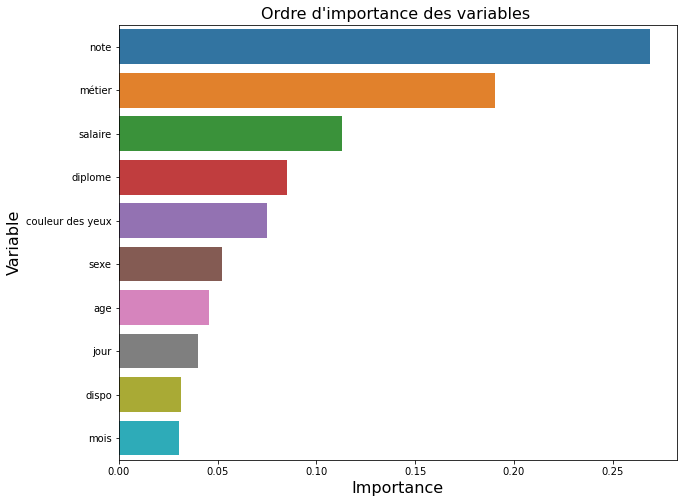

In [331]:
dataFrameResultat = pd.DataFrame({
    'Feature Name': X_train.columns,
    'Importance':dtree.feature_importances_
})
dfi = dataFrameResultat.sort_values(by="Importance",ascending=False)
dfi2 = dfi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=dfi2,x="Importance",y="Feature Name")
plt.title("Ordre d'importance des variables ",fontsize=16)
plt.xlabel("Importance",fontsize=16)
plt.ylabel("Variable",fontsize=16)
plt.show()

In [ ]:
#print("R2 Score: ", r2_score(Y_test, y_pred))
#print("Mean Squared Error: ", mean_squared_error(Y_test, y_pred))
#print("Mean Absolute Error: ", mean_absolute_error(Y_test, y_pred))
#print('RMSE:', np.sqrt(mean_squared_error(Y_test, y_pred)))

# Conclusion de notre etude

Aprés une longue analyse sur les données mise à notre dispositions pour la comprehension du processus de recrutement de l'entreprise CANDI-DATA,nous pouvons dire que le recrutement d'un candidat depends :
   - Du métier au quel il candidate 
   - De son Diplome
   - Du nombre d'années d'experience
En Effet,les candidats qui candidatent aux métiers de Data Scientist,Data Analyst ou Data Engineer avec des diplomes de Master ou de Licence et avec un certain nombre d'années d'experience ont plus de chance d'etre embauchés.

Et pour ce qui est de l'utilisation de l'intellingence Artificielle on a utilisé deux modeles (RandomForesClasifier et DecisionTreeClassifier) aprés evaluation des modeles,le RandomForesClassifier a été le meilleur avec 90.54 % de performance